In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
print('Setup Completed')

Setup Completed


In [2]:
df = pd.read_excel(r'C:\Users\SH2\Downloads\HouseData.xlsx')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,20141022T000000,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,20141126T000000,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,20150129T000000,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,20150331T000000,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,20140911T000000,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215
5,8835770170,20140822T000000,1488000,5,6.00,6880,279968,2.0,No,Good,Average,12,2007,98045,47.4624,-121.779
6,4139500080,20140718T000000,1488000,4,4.25,5180,13077,2.0,No,Good,Average,12,1998,98006,47.5513,-122.109
7,3885805665,20140612T000000,1485000,4,3.75,4030,10800,2.0,No,No View,Average,10,2006,98033,47.6821,-122.196
8,3885805175,20141001T000000,1485000,4,3.25,3730,7200,2.0,No,No View,Average,10,2006,98033,47.6824,-122.199
9,8835401250,20150506T000000,1485000,6,2.75,4430,6440,2.0,No,Good,Average,10,1964,98118,47.5462,-122.265


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21060 entries, 0 to 21059
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21060 non-null  int64  
 1   date         21060 non-null  object 
 2   price        21060 non-null  int64  
 3   bedrooms     21060 non-null  int64  
 4   bathrooms    21060 non-null  float64
 5   sqft_living  21060 non-null  int64  
 6   sqft_lot     21060 non-null  int64  
 7   floors       21060 non-null  float64
 8   waterfront   21060 non-null  object 
 9   view         21060 non-null  object 
 10  condition    21060 non-null  object 
 11  grade        21060 non-null  int64  
 12  yr_built     21060 non-null  int64  
 13  zipcode      21060 non-null  int64  
 14  lat          21060 non-null  float64
 15  long         21060 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 2.6+ MB


In [5]:
df.dtypes

id               int64
date            object
price            int64
bedrooms         int64
bathrooms      float64
sqft_living      int64
sqft_lot         int64
floors         float64
waterfront      object
view            object
condition       object
grade            int64
yr_built         int64
zipcode          int64
lat            float64
long           float64
dtype: object

In [6]:
# convert date column from object type into date type
df['date'] =pd.to_datetime(df['date'])

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,98034,47.6995,-122.228
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,98040,47.5738,-122.215


In [8]:
df.shape

(21060, 16)

In [9]:
print(df.date.min())
print(df.date.max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [10]:
#checking null values
df.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
yr_built       0
zipcode        0
lat            0
long           0
dtype: int64

In [11]:
# checking duplicate values
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long


In [12]:
df.describe().transpose().round(2)

,count,mean,min,25%,50%,75%,max,std
id,21060.0,4591326900.245347,1000102.0,2125056618.75,3905030405.0,7334500290.0,9900000190.0,2877902238.475562
date,21060,2014-10-29 02:47:18.974359040,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,21060.0,500269.623884,75000.0,319950.0,445000.0,625000.0,1495000.0,246577.453089
bedrooms,21060.0,3.343162,0.0,3.0,3.0,4.0,7.0,0.882395
bathrooms,21060.0,2.077991,0.0,1.5,2.25,2.5,6.75,0.729351
sqft_living,21060.0,2019.486942,290.0,1410.0,1890.0,2490.0,7480.0,822.018441
sqft_lot,21060.0,14743.007835,520.0,5001.0,7553.5,10454.0,1651359.0,39956.969828
floors,21060.0,1.484924,1.0,1.0,1.0,2.0,3.5,0.538113
grade,21060.0,7.590123,1.0,7.0,7.0,8.0,12.0,1.095947
yr_built,21060.0,1970.919943,1900.0,1951.0,1975.0,1996.0,2015.0,29.265667


In [13]:
df['waterfront'].value_counts()

waterfront
No     20976
Yes       84
Name: count, dtype: int64

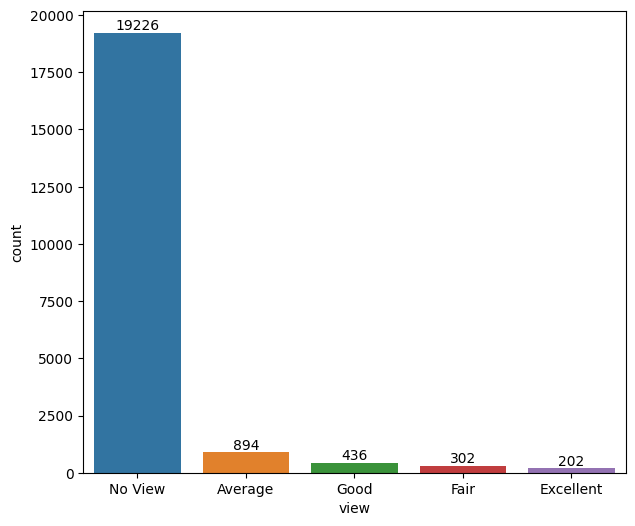

In [14]:
plt.figure(figsize=(7,6),dpi=100)
ax = sns.countplot(x = df['view'])
for bar in ax.containers:
    ax.bar_label(bar)

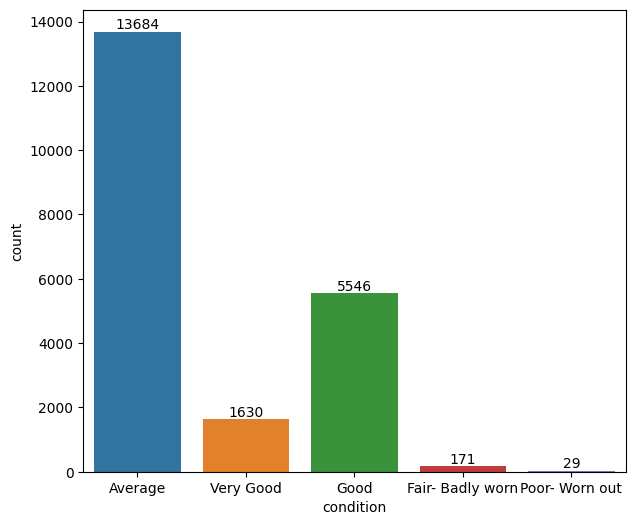

In [15]:
plt.figure(figsize=(7,6),dpi=100)
ax = sns.countplot(x = df['condition'])
for bar in ax.containers:
    ax.bar_label(bar)

In [16]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,98004,47.5862,-122.198
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,98122,47.6157,-122.287
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,98004,47.6214,-122.227


In [17]:
df.drop(columns=['zipcode'],inplace=True)

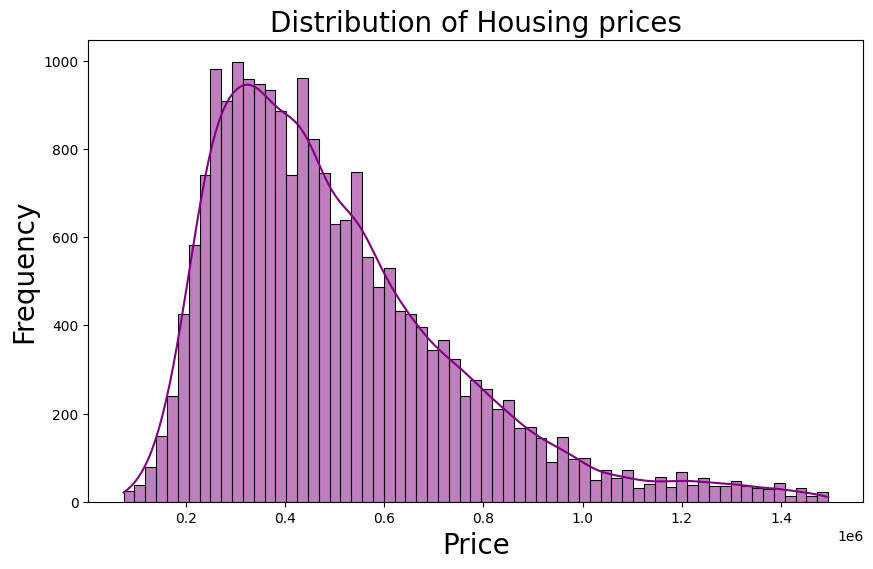

In [18]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(df['price'],kde=True,color = 'purple')
plt.title('Distribution of Housing prices',size=20)
plt.xlabel('Price',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

# Preprocessing and Adding columns

In [19]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,lat,long,month,day,year
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,47.5862,-122.198,10,22,2014
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,47.6157,-122.287,11,26,2014
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,47.6214,-122.227,1,29,2015
3,9522300010,2015-03-31,1490000,3,3.50,4560,14608,2.0,No,Average,Average,12,1990,47.6995,-122.228,3,31,2015
4,31000165,2014-09-11,1490000,5,3.50,3620,7821,2.0,No,Average,Average,10,1958,47.5738,-122.215,9,11,2014


# Analyzing Data 

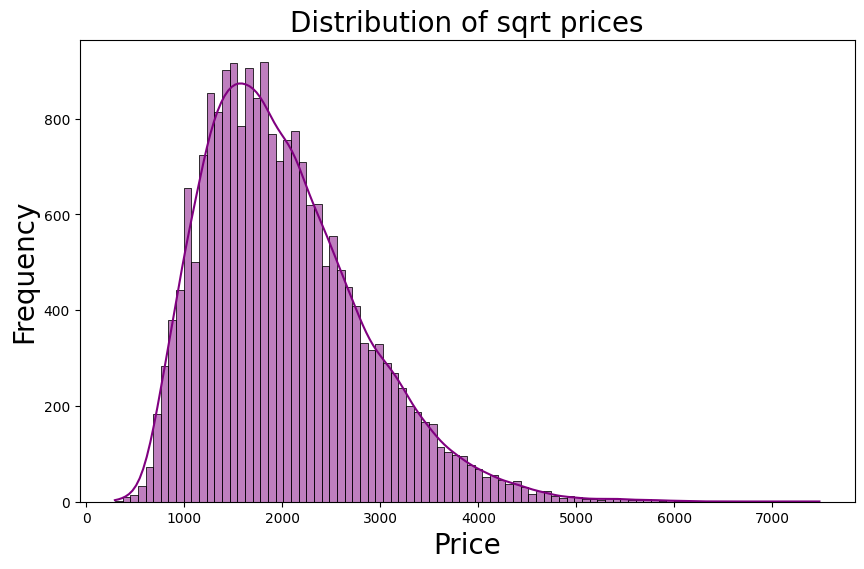

In [21]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(df['sqft_living'],kde=True,color = 'purple')
plt.title('Distribution of sqrt prices',size=20)
plt.xlabel('Price',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

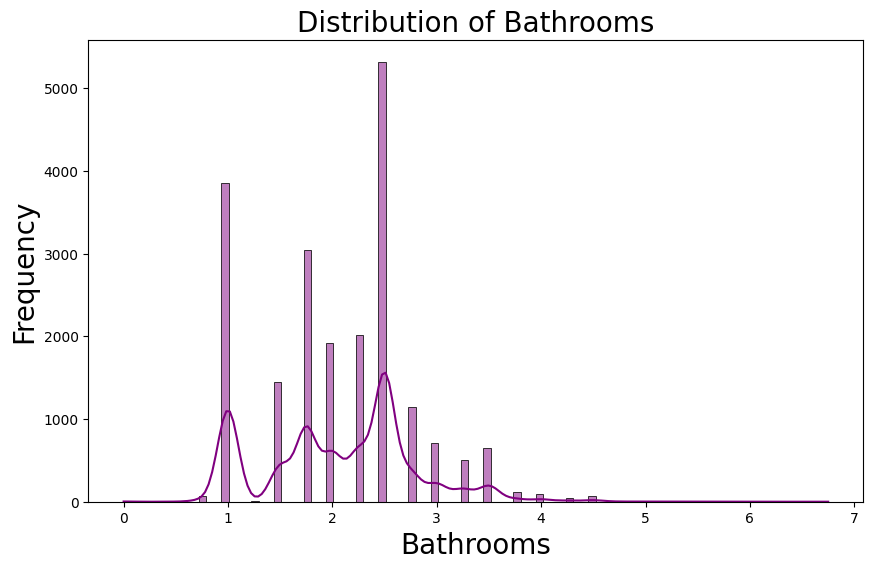

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(df['bathrooms'],kde=True,color = 'purple')
plt.title('Distribution of Bathrooms',size=20)
plt.xlabel('Bathrooms',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

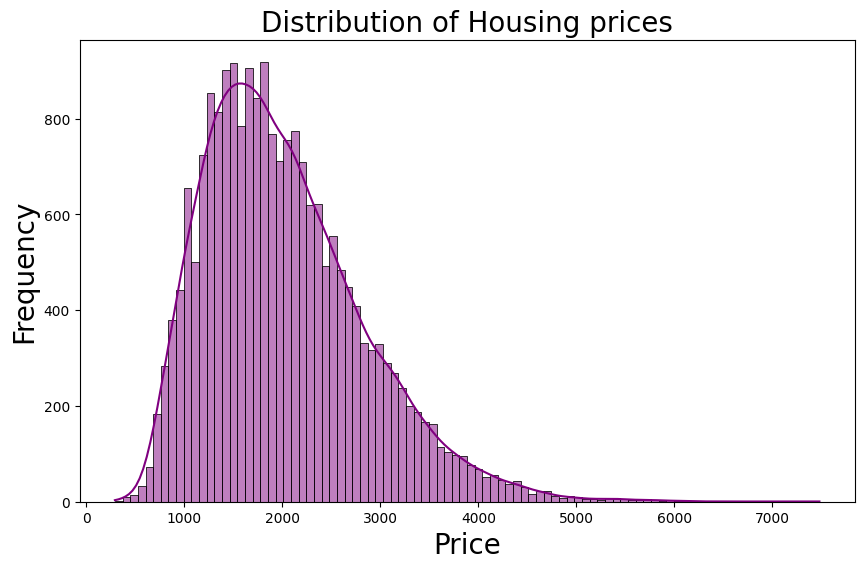

In [24]:
plt.figure(figsize=(10,6),dpi=100)
sns.histplot(df['sqft_living'],kde=True,color = 'purple')
plt.title('Distribution of Housing prices',size=20)
plt.xlabel('Price',size=20)
plt.ylabel('Frequency',size=20)
plt.show()

In [32]:
import plotly.graph_objects as go
from plotly.offline import plot

average_price_by_month = df.groupby(['month'])['price'].mean().sort_values(ascending=False).round(2)

# Define custom colors for each month
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)']

fig = go.Figure(data=[go.Bar(x=average_price_by_month.index,
                             y=average_price_by_month.values,
                             marker_color=colors)])

fig.update_layout(title='Average Price by Month',
                  xaxis_title='Month',
                  yaxis_title='Average Price')

# Save the figure as an HTML file
plot(fig, filename='average_price.html')

'average_price.html'

In [ ]:
daily_avg_price = df.groupby(['date'])['price'].mean().round(2)

# Create a new DataFrame with daily average price and sales
df_daily = pd.DataFrame({'Date': daily_avg_price.index, 'Average Price': daily_avg_price.values})

# Create the line chart using Plotly Graph Objects
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_daily['Date'], y=df_daily['Average Price'], name='Average Price',
                         line=dict(color='red')))

fig.update_layout(title='Daily Average House Price ',
                  xaxis_title='Date',
                  yaxis_title='Average Price'
                  )

fig.show()

<AxesSubplot:>

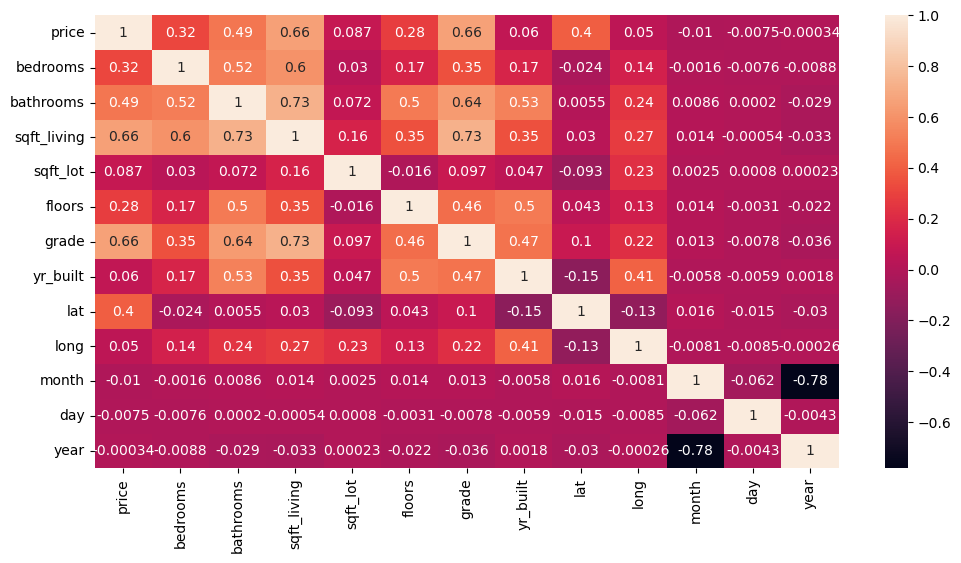

In [ ]:
## Heatmap to show the relation between columns
df.drop(columns=['id'],inplace=True)
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(df.corr(),annot=True)

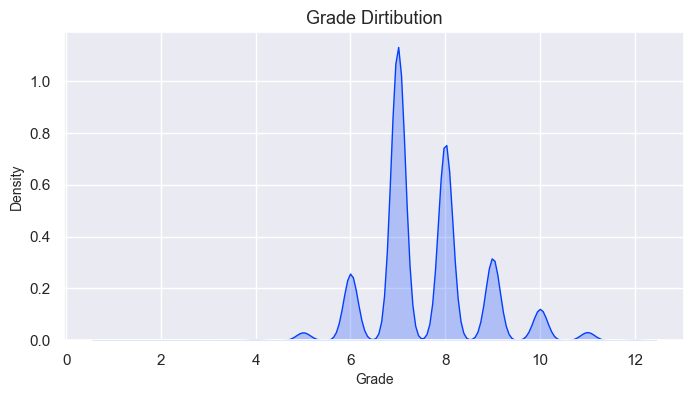

In [39]:
plt.figure(figsize=(8,4),dpi=100)
sns.kdeplot(df['grade'],shade=True)
plt.xlabel('Grade',size=10)
plt.ylabel('Density',size=10)
plt.title('Grade Dirtibution',size=13)
plt.show()

In [ ]:
df.sample(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,lat,long,month,day,year
18574,2014-08-25,252500,4,2.50,2600,11280,1.5,No,No View,Average,7,1961,47.3360,-122.304,8,25,2014
2181,2014-07-01,825000,4,2.75,3990,6637,2.0,No,No View,Average,9,2003,47.6835,-122.045,7,1,2014
1884,2014-12-15,852500,5,3.75,3830,8131,2.0,No,No View,Average,10,2005,47.5837,-121.971,12,15,2014


<Figure size 1200x600 with 0 Axes>

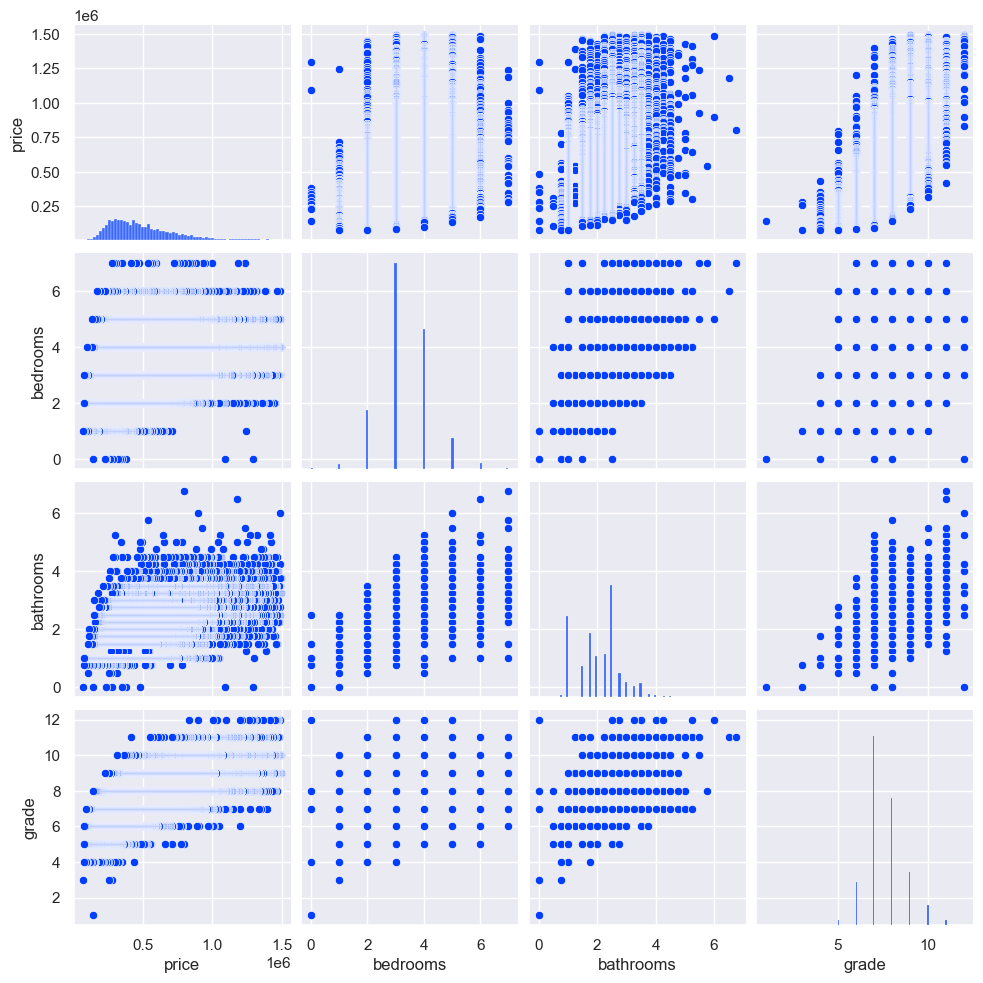

In [36]:
plt.figure(figsize=(12,6),dpi=100)
sns.set(palette ='bright')
sns.pairplot(df[['price','bedrooms','bathrooms','grade']])

In [37]:
df['waterfront'].value_counts()

waterfront
No     20976
Yes       84
Name: count, dtype: int64

In [38]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,lat,long,month,day,year
0,629000615,2014-10-22,1495000,4,3.25,3070,10375,2.0,No,No View,Average,10,1962,47.5862,-122.198,10,22,2014
1,4141800215,2014-11-26,1495000,4,3.75,3770,4000,2.5,No,No View,Very Good,9,1916,47.6157,-122.287,11,26,2014
2,6448000020,2015-01-29,1490000,4,2.50,2420,18480,1.0,No,No View,Good,9,1967,47.6214,-122.227,1,29,2015
